In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Model and priors

Let $y=(y_1,\dots,y_n)$ be a r.s. from a N($\mu,v$) where $v$ is distributed according to an IGamma($\frac{N}{2},\frac{N}{2}\sigma^2$). The parameter $N$ is assumed to be known. Finalise the model with an improper prior on $\mu,\sigma^2$, $\pi(\mu,\sigma^2)\propto 1$.


### Gibbs Sampler details

The full conditional posterior for $v$ is
\begin{align*}
  \pi(v|\mu,\sigma^2,y)&  \propto v^{-\frac{n+N}{2}-1} \exp\left(-\frac{\frac{\sum_{i=1}^n(y_i-\mu)^2}{2}}{v}\right) \exp\left(-\frac{\frac{N}{2}\sigma^2}{ v}\right)\\
  &=v^{-\frac{n+N}{2}-1}  \exp\left(-\frac{\frac{N\sigma^2+\sum_{i=1}^n(y_i-\mu)^2}{2}}{v}\right)\\
  &\overset{\mathcal{D}}{=} \text{IGamma}\left(\frac{n+N}{2}, \frac{N\sigma^2+\sum_{i=1}^n(y_i-\mu)^2}{2}\right),
\end{align*}

whereas for $\mu$ is

\begin{align*}
  \pi(\mu|v,\sigma^2,y)&\propto \exp\left(-\sum_{i=1}^n\frac{(\mu^2-2\mu y_i+y_i^2)}{2v}\right)\propto\exp\left(-\frac{n\mu^2-2\mu \sum_{i=1}^n y_i}{2v} \right)\\
  &=\exp\left(-\frac{\mu^2-2\mu\bar{y}}{2v/n}\right)
  \overset{\mathcal{D}}{=} \text{ N} \left(\bar{y},\frac{v}{n}\right),
\end{align*}

and for $\sigma^2$

\begin{align*}
  \pi(\sigma^2|v,\mu,y)&\propto (\sigma^2)^{N/2 +1 -1} \exp\left(-\frac{N}{2v}\sigma^2\right)
  \overset{\mathcal{D}}{=} \text{ Gamma} \left(N/2 +1,\frac{N}{2v}\right),
\end{align*}


### Simulate data

Generate $200$ numbers from the model above with $\mu=0$, $\sigma^2=1$, $v=1$ and $N=20$. 


In [35]:
#Simulate data to check the Gibbs sampler
n = 200 #sample size
mu_true = 2
v_true = 1
sigma2_true = 1
N = 20
#v = 1/np.random.gamma(N/2,2/(N*sigma2_true),n)
y = mu_true + np.random.randn(n)*np.sqrt(v_true)
ybar = np.mean(y)
S2 = np.sum((y-ybar)**2)
print('data:',y)
print('sample mean:',ybar)
print('sample variance:',S2/(n-1))

data: [ 0.17749736  2.52763271  1.76563391  1.83326003  2.13336266  1.80829268
  2.40993238  1.80974618  1.65095443  2.13811709  3.12877988  3.16562908
  1.52482072  2.80537081  1.58404221  2.59594567  2.05423291  2.733664
  1.98210606  1.10583575  3.18399688  1.81246725  1.91268753 -0.29402443
  2.69392241  2.33448046  3.03331172  2.10009277  3.92065078  0.80753462
  1.26678009  3.43610371  2.32482516  3.35614088  1.2183675   3.43138913
  1.71251859  2.35030765 -1.0483382   1.31459616  1.14622347  1.39324569
 -0.26875397  3.22043426  3.47852487  1.78431563  0.29787081  2.12266503
  0.22026008  0.84502231  2.58706624  2.42502434  3.03087462 -0.48482025
  2.18202909  2.92879387  1.03778429  1.16651087  1.7723951   2.31628764
  2.03915391  2.15485944  2.59073409  0.97339602  2.89719294  0.32817438
  2.33421048  1.62931232  3.87810837  2.13201406  1.92929634  0.85593748
  1.27662043  1.45382102  1.94548589  2.66043027  1.02637221  2.72283627
  0.72725712  2.67888425  2.15385431  1.8090056

### Now we run the Gibbs sampler 

In [36]:
N = 10000 # number of iterations

#create object mus and sigma2s to store the Markov chain samples, 
#with $\pi(\theta,\sigma^2|y)$ as stationary distribution
mus = np.zeros(N)
vs = np.zeros(N)
sigma2s = np.zeros(N)


#Set initial values for mu and sigma2
mu = 10
sigma2 = 5
v = 4

for iter in range(N):
    #Store current value of the chain (mu,sigma2)
    mus[iter] = mu
    vs[iter] = v
    sigma2s[iter] = sigma2
    
    #Draw mu given y, v and sigma2
    mu = ybar + np.sqrt(v/n)*np.random.randn(1)  #Draw from the full conditional of mu
    
    #Draw v given y, sigma2 and mu
    A = 0.5*(n + N)                  #a parameter of the full conditional of v
    B = N*sigma2 + np.sum((y-mu)**2) #B parameter of the full conditional of sigma2
    v = 1/np.random.gamma(A, 2/B, 1)
    
    #Draw sigma2 given y, v and mu
    sigma2 = 1/np.random.gamma(1+0.5*N, 2*v/N, 1)

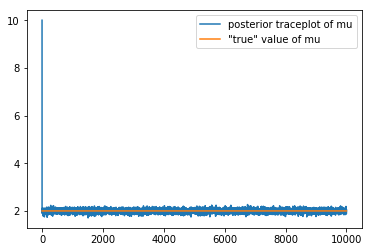

In [37]:
plt.plot(mus,label='posterior traceplot of mu')
plt.plot(np.ones(N)*mu_true,label='"true" value of mu')
plt.legend()

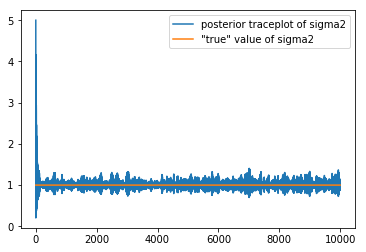

In [38]:
plt.plot(sigma2s,label='posterior traceplot of sigma2')
plt.plot(np.ones(N)*sigma2_true,label='"true" value of sigma2')
plt.legend()

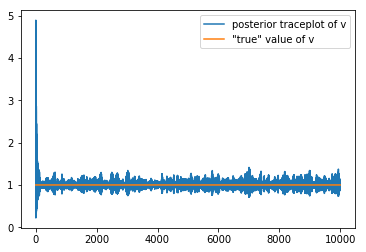

In [39]:
plt.plot(vs,label='posterior traceplot of v')
plt.plot(np.ones(N)*v_true,label='"true" value of v')
plt.legend()

In [42]:
#present the output via a pandas data frame
mmu = np.mean(mus)
medmu = np.median(mus)
pctmu = np.percentile(mus,(2.5,97.5))
mv = np.mean(vs)
medv = np.median(vs)
pctv = np.percentile(vs,(2.5,97.5))
msig = np.mean(sigma2s)
medsig = np.median(sigma2s)
pctsig = np.percentile(sigma2s,(2.5,97.5))
results = np.array([[mmu,medmu,pctmu[0],pctmu[1]],[mv,medv,pctv[0],pctv[1]],[msig,medsig,pctsig[0],pctsig[1]]]).round(3)
col = ['Posterior mean','Posterior median','Posterior 2.5% point','Posterior 97.5% point']
ind = ['mu','v','sigma2']
results = pd.DataFrame(results,columns = col,index=ind)
results

,Posterior mean,Posterior median,Posterior 2.5% point,Posterior 97.5% point
mu,1.998,1.998,1.859,2.136
v,1.009,1.001,0.811,1.235
sigma2,1.008,1.000,0.808,1.234
